In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier



from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [17]:
scores = pd.read_csv("..\\dados\\selecao_final.csv",sep=';')
X = scores.drop(["Gain/Loss", "Gain","Set",'SubjID','Choice',"GameID","Amb","Corr", "Payoff", "Forgone", "Apay", "Bpay", "block","RT","BiasedOption"], axis=1).select_dtypes(exclude=['object'])
X.head()

,Gender,Age,HighValue,pHighValue,LowValue,LotNum,Order,Trial,Feedback,EV,Loss
0,1,26,-3,1.0,-3,1,19,1,0,-3.0,0
1,1,26,-3,1.0,-3,1,19,2,0,-3.0,0
2,1,26,-3,1.0,-3,1,19,3,0,-3.0,0
3,1,26,-3,1.0,-3,1,19,4,0,-3.0,0
4,1,26,-3,1.0,-3,1,19,5,0,-3.0,0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34800 entries, 0 to 34799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      34800 non-null  int64  
 1   Age         34800 non-null  int64  
 2   HighValue   34800 non-null  int64  
 3   pHighValue  34800 non-null  float64
 4   LowValue    34800 non-null  int64  
 5   LotNum      34800 non-null  int64  
 6   Order       34800 non-null  int64  
 7   Trial       34800 non-null  int64  
 8   Feedback    34800 non-null  int64  
 9   EV          34800 non-null  float64
 10  Gain        34800 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.9 MB


In [ ]:
evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

In [ ]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

In [18]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = X['Loss']

train_data, test_data, train_labels, test_labels = train_test_split(X_scaled, y, train_size=0.8, random_state=3)

independent_vars = ["Gender", "HighValue", "pHighValue", "LowValue", "Trial",  "Order", "Age", "EV", "LotNum", "Feedback"] # "Feedback"
X_train = train_data[:, [X.columns.get_loc(col) for col in independent_vars]]
X_test = test_data[:, [X.columns.get_loc(col) for col in independent_vars]]

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, train_labels)


In [19]:
# chamar o fit para o modelo
model = LogisticRegression()

model.fit(X_train_resampled, y_train_resampled)

# fazer previsões em cima do dataset de teste
predictions = model.predict(X_test)

print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, test_labels)))

Erro Médio Absoluto: 0.29


In [ ]:
rmse = metrics.mean_squared_error(test_labels, pred)
r2_train = lin_reg.score(X_train, train_labels)
ar2_train = adjusted_r2(r2_train, train_data.shape[0], len(independent_vars))

r2_test = lin_reg.score(X_test, test_labels)
ar2_test = adjusted_r2(r2_test, test_data.shape[0], len(independent_vars))

cross_val = cross_val_score(lin_reg, X_scaled, y, cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)

In [15]:
# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(X.corr(), dtype=np.bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<ipython-input-15-63436226cfa6>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X.corr(), dtype=np.bool)


In [ ]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    X.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [ ]:
# fazer previsões em cima do dataset de teste
predictions = model.predict(X_test)

print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, test_labels)))

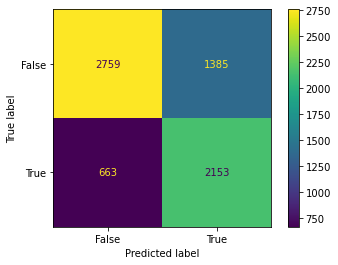

In [20]:
predictions_int = np.asarray(predictions, dtype = 'int')

confusion_matrix = metrics.confusion_matrix(test_labels, predictions_int)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(scores.corr(), dtype=np.bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

In [ ]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    scores.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [ ]:
X = np.column_stack((scores['SubjID'], scores['Gender'], scores['HighValue'],
                    scores['pHighValue'], scores['LowValue'], scores['Trial'],
                     scores['Feedback']))
y = scores['Choice']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())